<a href="https://colab.research.google.com/github/Ch-27/apple_leaf_disease_DETECTION/blob/main/plant_apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chinmaya2703","key":"37830e150b2860b2b999ca6b1aec7634"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d

In [ ]:
!kaggle competitions download -c plant-pathology-2021-fgvc8

In [ ]:
!unzip plant-pathology-2021-fgvc8.zip

In [ ]:
!pip install tensorflow-addons

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from tqdm import tqdm
import tensorflow_addons as tfa
import random
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option("display.max_columns", None)

18632
Index(['image', 'labels'], dtype='object')
Axes(0.125,0.11;0.775x0.77)


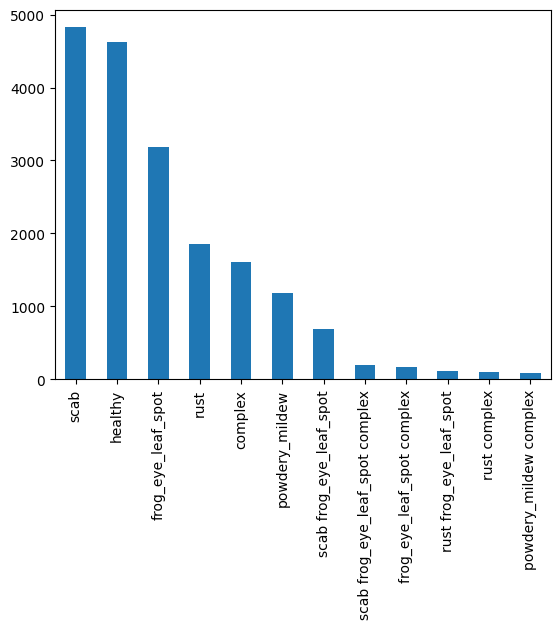

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/apple_leaf/train_dataset.csv')
print(len(train))
print(train.columns)
# print(train['labels'].value_counts())
print(train['labels'].value_counts().plot.bar())

In [ ]:
train['labels'] = train['labels'].apply(lambda string: string.split(' '))
train

,image,labels
0,800113bb65efe69e.jpg,[healthy]
1,8002cb321f8bfcdf.jpg,"[scab, frog_eye_leaf_spot, complex]"
2,80070f7fb5e2ccaa.jpg,[scab]
3,80077517781fb94f.jpg,[scab]
4,800cbf0ff87721f8.jpg,[complex]
...,...,...
18627,fffb900a92289a33.jpg,[healthy]
18628,fffc488fa4c0e80c.jpg,[scab]
18629,fffc94e092a59086.jpg,[rust]
18630,fffe105cf6808292.jpg,"[scab, frog_eye_leaf_spot]"


Index(['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust',
       'scab'],
      dtype='object')
complex               2151
frog_eye_leaf_spot    4352
healthy               4624
powdery_mildew        1271
rust                  2077
scab                  5712
dtype: int64
['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']


<Axes: >

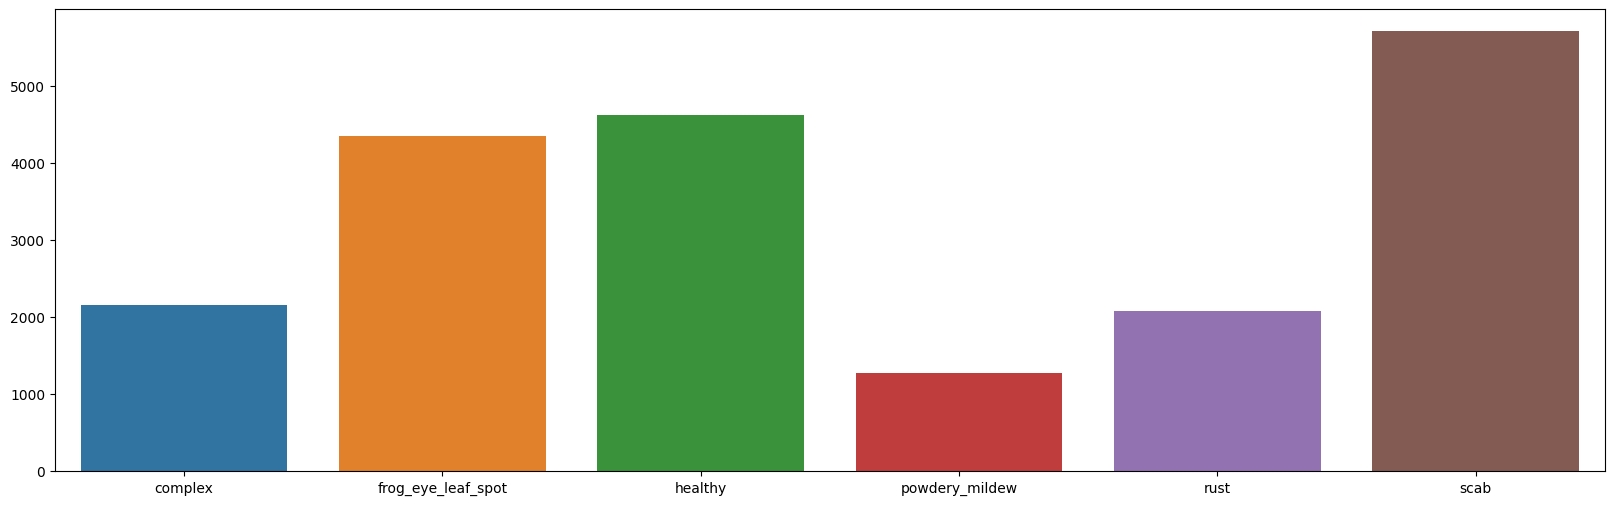

In [ ]:
s = list(train['labels'])
mlb = MultiLabelBinarizer()
trainx = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=train.index)
print(trainx.columns)
print(trainx.sum())

labels = list(trainx.sum().keys())
print(labels)
label_counts = trainx.sum().values.tolist()

fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.barplot(x= labels, y= label_counts, ax=ax)

In [ ]:
!kaggle datasets download -d ankursingh12/resized-plant2021

100% 1.42G/1.42G [00:15<00:00, 111MB/s] 
100% 1.42G/1.42G [00:15<00:00, 99.8MB/s]


In [ ]:
!unzip resized-plant2021.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_sz_640/e00c97b2de4749ce.jpg  
  inflating: img_sz_640/e00df890cfe62736.jpg  
  inflating: img_sz_640/e00ed0bf43a87f25.jpg  
  inflating: img_sz_640/e00f759d65d52887.jpg  
  inflating: img_sz_640/e00f934d9e50ad5b.jpg  
  inflating: img_sz_640/e00fce341cb63da5.jpg  
  inflating: img_sz_640/e010c7c35ecf3d1c.jpg  
  inflating: img_sz_640/e01112939f783fec.jpg  
  inflating: img_sz_640/e01592da4d71b8be.jpg  
  inflating: img_sz_640/e0189acaf8cf80fd.jpg  
  inflating: img_sz_640/e0189e4999bdd0fa.jpg  
  inflating: img_sz_640/e01ae16d4a759cb5.jpg  
  inflating: img_sz_640/e01dc39ccb2b4ccb.jpg  
  inflating: img_sz_640/e01e42d90c66f3f3.jpg  
  inflating: img_sz_640/e01e870bec65f40f.jpg  
  inflating: img_sz_640/e01f17e0187fb80f.jpg  
  inflating: img_sz_640/e01f503cb752e6c5.jpg  
  inflating: img_sz_640/e024b69a784e9fc3.jpg  
  inflating: img_sz_640/e026b4c23c9fcfc4.jpg  
  inflating: img_sz_640/e027c790fc0a5edc.jpg  
  inflati

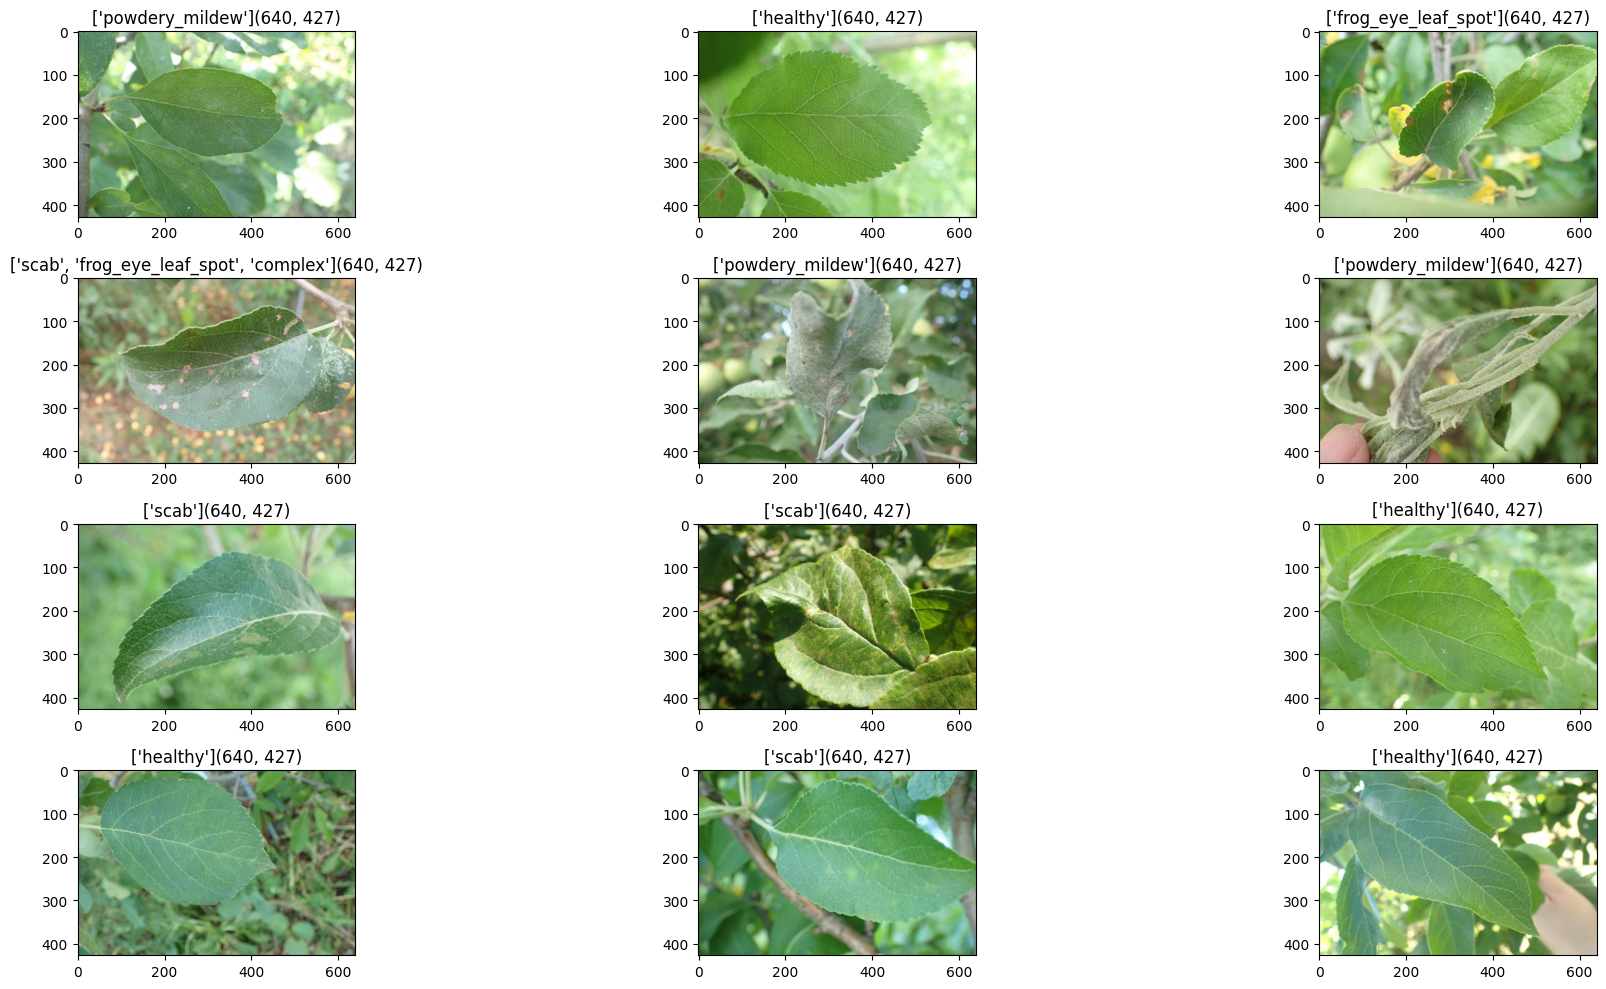

In [ ]:
fig1 = plt.figure(figsize=(26,10))

for i in range(1, 13):

    rand =  random.randrange(1, 18000)
    sample = os.path.join('/content/img_sz_640', train['image'][rand])

    img = PIL.Image.open(sample)

    ax = fig1.add_subplot(4,3,i)
    ax.imshow(img)

    title = f"{train['labels'][rand]}{img.size}"
    plt.title(title)

    fig1.tight_layout()

In [ ]:
# from fastai.vision.all import *

# path = Path('')
# for sz in [256, 384, 512, 640]:
#     resize_images(path/'train_images', max_size=sz, dest=f'img_sz_{sz}')
#     print(f'{sz} - Done!')

In [ ]:
%%time
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                        preprocessing_function=None,
                                                        data_format=None,
                                                    )

CPU times: user 63 µs, sys: 0 ns, total: 63 µs
Wall time: 65.6 µs


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have a dataframe named 'train' with columns 'image' and 'labels'
# Assuming train_data is the generator you created

# Extract file paths and labels from the dataframe
X = train[['image', 'labels']]

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    data_format=None,
)

# Create generators
train_data = datagen.flow_from_dataframe(
    X_train,
    directory='/content/img_sz_256',
    x_col="image",
    y_col="labels",
    color_mode="rgb",
    target_size=(256, 256),
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=40,
)

test_data = datagen.flow_from_dataframe(
    X_test,
    directory='/content/img_sz_256',
    x_col="image",
    y_col="labels",
    color_mode="rgb",
    target_size=(256, 256),
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=40,
)


Found 14905 validated image filenames belonging to 6 classes.
Found 3727 validated image filenames belonging to 6 classes.


In [ ]:
seed = 1200
tf.random.set_seed(seed)

weights_path = '/content/drive/MyDrive/major/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'
model = keras.applications.InceptionResNetV2(weights=weights_path, include_top=False, input_shape=(256, 256, 3))

print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 1536), dtype=tf.float32, name=None), name='conv_7b_ac/Relu:0', description="created by layer 'conv_7b_ac'")


In [ ]:
new_model = tf.keras.Sequential([
    model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(6,
        kernel_initializer=keras.initializers.RandomUniform(seed=seed),
        bias_initializer=keras.initializers.Zeros(), name='dense_top', activation='sigmoid')
])

# Freezing the weights
for layer in new_model.layers[:-1]:
    layer.trainable=False

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 6, 6, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_top (Dense)           (None, 6)                 9222      
                                                                 
Total params: 54345958 (207.31 MB)
Trainable params: 9222 (36.02 KB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________


In [ ]:


# Assuming you have already created your model and train_data generator
# Replace this with your actual model and training data

# Example model creation
#new_model = keras.Sequential([...])  # Replace [...] with your actual model architecture

# Assuming you have a train_data generator
# Replace this with your actual training data
# train_data = ...

# Assuming you have a validation set (X_val, y_val)
# Replace this with your actual validation data
# X_val, y_val = ...

# Assuming X and y are your features and labels
# Split your data into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming num_classes is the number of classes in your classification problem
num_classes = 6

# Create F1 Score metric
f1 = tfa.metrics.F1Score(num_classes=num_classes, average='macro')

# Create EarlyStopping callback
callbacks = keras.callbacks.EarlyStopping(monitor=f1, patience=3, mode='max', restore_best_weights=True)

# Compile the model
new_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', f1]
)

# Train the model
history = new_model.fit(
    train_data, # Replace with your actual training data
    epochs=40,
    validation_data=(test_data),  # Replace with your actual validation data
    callbacks=[callbacks]
)


In [ ]:
new_model.save('/content/drive/MyDrive/major/trained_model_inception.h5')

In [ ]:
new_model.save('/content/drive/MyDrive/major/trained_model_inception.keras')

In [ ]:
!pip install tensorflow-addons
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/MyDrive/major/trained_model_inception.keras')

In [ ]:
#history = new_model.fit(train_data, epochs=40, validation_data=test_data)

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Assuming you have a generator for your test data
predictions = new_model.predict(test_data)

evaluation = new_model.evaluate(test_data)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

117/117 [==============================] - 34s 221ms/step - loss: 0.2664 - accuracy: 0.6823 - f1_score: 0.6550
Test Loss: 0.26643720269203186
Test Accuracy: 0.6823182106018066


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a generator for your test data
# It's important that the generator is set to shuffle=False to ensure correct order
test_data.reset()

# Use the trained model to make predictions
y_true = [max(test_data.classes[i]) for i in range(len(test_data))]  # Ground truth labels
y_pred_probs = new_model.predict(test_data)  # Predicted probabilities
y_true_np = np.array(y_true)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)
#print(len(y_pred_labels))
# Calculate confusion matrix
# cm = confusion_matrix(y_true, y_pred_labels)

# # Plot confusion matrix using seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


117/117 [==============================] - 24s 208ms/step
3727


[2 5 5 5 2 5 1 1 5 5]


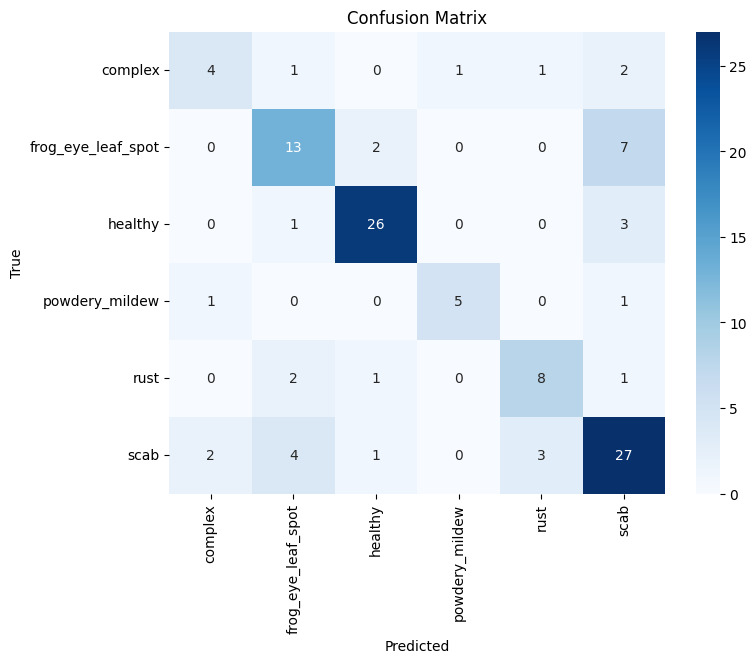

In [ ]:
y_true_np = np.array(y_true)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)
#print(y_pred_labels[0:10])
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels[0:117])

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true_np, y_pred_labels[0:117])

0.7094017094017094

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_labels[0:117])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.62      0.59      0.60        22
           2       0.87      0.87      0.87        30
           3       0.83      0.71      0.77         7
           4       0.67      0.67      0.67        12
           5       0.66      0.73      0.69        37

    accuracy                           0.71       117
   macro avg       0.70      0.67      0.68       117
weighted avg       0.71      0.71      0.71       117



In [ ]:
seed = 1200
tf.random.set_seed(seed)

# Load VGG19 with pre-trained weights (ImageNet)
base_model = keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Display model architecture
base_model.summary()

In [ ]:
for layer in base_model.layers:
    layer.trainable=False
new_model1 = tf.keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(6,
        kernel_initializer=keras.initializers.RandomUniform(seed=seed),
        bias_initializer=keras.initializers.Zeros(), name='dense_top', activation='sigmoid')
])


new_model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_4  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_top (Dense)           (None, 6)                 3078      
                                                                 
Total params: 20027462 (76.40 MB)
Trainable params: 3078 (12.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
num_classes = 6

# Create F1 Score metric
f1 = tfa.metrics.F1Score(num_classes=num_classes, average='macro')

# Create EarlyStopping callback
callbacks = keras.callbacks.EarlyStopping(monitor=f1, patience=3, mode='max', restore_best_weights=True)

# Compile the model
new_model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', f1]
)

# Train the model
history = new_model1.fit(
    train_data, # Replace with your actual training data
    epochs=40,
    validation_data=(test_data),  # Replace with your actual validation data
    callbacks=[callbacks]
)

Epoch 1/40
466/466 [==============================] - ETA: 0s - loss: 0.4836 - accuracy: 0.2577 - f1_score: 0.1202

466/466 [==============================] - 130s 277ms/step - loss: 0.4836 - accuracy: 0.2577 - f1_score: 0.1202 - val_loss: 0.4443 - val_accuracy: 0.2530 - val_f1_score: 0.0786
Epoch 2/40
466/466 [==============================] - ETA: 0s - loss: 0.4426 - accuracy: 0.2710 - f1_score: 0.0975

466/466 [==============================] - 108s 231ms/step - loss: 0.4426 - accuracy: 0.2710 - f1_score: 0.0975 - val_loss: 0.4394 - val_accuracy: 0.2568 - val_f1_score: 0.0831
Epoch 3/40
466/466 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.2879 - f1_score: 0.1192

466/466 [==============================] - 108s 231ms/step - loss: 0.4386 - accuracy: 0.2879 - f1_score: 0.1192 - val_loss: 0.4360 - val_accuracy: 0.2772 - val_f1_score: 0.1117
Epoch 4/40
466/466 [==============================] - ETA: 0s - loss: 0.4351 - accuracy: 0.3077 - f1_score: 0.1398

466/466 [==============================] - 108s 231ms/step - loss: 0.4351 - accuracy: 0.3077 - f1_score: 0.1398 - val_loss: 0.4327 - val_accuracy: 0.3222 - val_f1_score: 0.1618
Epoch 5/40
466/466 [==============================] - ETA: 0s - loss: 0.4319 - accuracy: 0.3222 - f1_score: 0.1567

466/466 [==============================] - 107s 230ms/step - loss: 0.4319 - accuracy: 0.3222 - f1_score: 0.1567 - val_loss: 0.4296 - val_accuracy: 0.3204 - val_f1_score: 0.1510
Epoch 6/40
466/466 [==============================] - ETA: 0s - loss: 0.4289 - accuracy: 0.3306 - f1_score: 0.1657

466/466 [==============================] - 108s 231ms/step - loss: 0.4289 - accuracy: 0.3306 - f1_score: 0.1657 - val_loss: 0.4270 - val_accuracy: 0.3332 - val_f1_score: 0.1697
Epoch 7/40
466/466 [==============================] - ETA: 0s - loss: 0.4261 - accuracy: 0.3431 - f1_score: 0.1811

466/466 [==============================] - 108s 231ms/step - loss: 0.4261 - accuracy: 0.3431 - f1_score: 0.1811 - val_loss: 0.4244 - val_accuracy: 0.3402 - val_f1_score: 0.1783
Epoch 8/40
466/466 [==============================] - ETA: 0s - loss: 0.4235 - accuracy: 0.3519 - f1_score: 0.1932

466/466 [==============================] - 108s 231ms/step - loss: 0.4235 - accuracy: 0.3519 - f1_score: 0.1932 - val_loss: 0.4222 - val_accuracy: 0.3574 - val_f1_score: 0.2005
Epoch 9/40
466/466 [==============================] - ETA: 0s - loss: 0.4212 - accuracy: 0.3600 - f1_score: 0.2048

466/466 [==============================] - 108s 231ms/step - loss: 0.4212 - accuracy: 0.3600 - f1_score: 0.2048 - val_loss: 0.4203 - val_accuracy: 0.3571 - val_f1_score: 0.2155
Epoch 10/40
466/466 [==============================] - ETA: 0s - loss: 0.4190 - accuracy: 0.3669 - f1_score: 0.2180

466/466 [==============================] - 107s 231ms/step - loss: 0.4190 - accuracy: 0.3669 - f1_score: 0.2180 - val_loss: 0.4180 - val_accuracy: 0.3646 - val_f1_score: 0.2186
Epoch 11/40
466/466 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.3744 - f1_score: 0.2311

466/466 [==============================] - 127s 273ms/step - loss: 0.4169 - accuracy: 0.3744 - f1_score: 0.2311 - val_loss: 0.4161 - val_accuracy: 0.3786 - val_f1_score: 0.2435
Epoch 12/40
466/466 [==============================] - ETA: 0s - loss: 0.4150 - accuracy: 0.3832 - f1_score: 0.2447

466/466 [==============================] - 108s 231ms/step - loss: 0.4150 - accuracy: 0.3832 - f1_score: 0.2447 - val_loss: 0.4143 - val_accuracy: 0.3746 - val_f1_score: 0.2354
Epoch 13/40
466/466 [==============================] - ETA: 0s - loss: 0.4132 - accuracy: 0.3869 - f1_score: 0.2526

466/466 [==============================] - 108s 231ms/step - loss: 0.4132 - accuracy: 0.3869 - f1_score: 0.2526 - val_loss: 0.4127 - val_accuracy: 0.3813 - val_f1_score: 0.2483
Epoch 14/40
466/466 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.3908 - f1_score: 0.2599

466/466 [==============================] - 108s 231ms/step - loss: 0.4115 - accuracy: 0.3908 - f1_score: 0.2599 - val_loss: 0.4110 - val_accuracy: 0.3920 - val_f1_score: 0.2618
Epoch 15/40
466/466 [==============================] - ETA: 0s - loss: 0.4099 - accuracy: 0.3946 - f1_score: 0.2672

466/466 [==============================] - 128s 274ms/step - loss: 0.4099 - accuracy: 0.3946 - f1_score: 0.2672 - val_loss: 0.4095 - val_accuracy: 0.3923 - val_f1_score: 0.2618
Epoch 16/40
466/466 [==============================] - ETA: 0s - loss: 0.4083 - accuracy: 0.3987 - f1_score: 0.2718

466/466 [==============================] - 128s 274ms/step - loss: 0.4083 - accuracy: 0.3987 - f1_score: 0.2718 - val_loss: 0.4081 - val_accuracy: 0.4030 - val_f1_score: 0.2801
Epoch 17/40
466/466 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.4024 - f1_score: 0.2787

466/466 [==============================] - 108s 232ms/step - loss: 0.4069 - accuracy: 0.4024 - f1_score: 0.2787 - val_loss: 0.4069 - val_accuracy: 0.4022 - val_f1_score: 0.2842
Epoch 18/40
466/466 [==============================] - ETA: 0s - loss: 0.4055 - accuracy: 0.4064 - f1_score: 0.2826

466/466 [==============================] - 128s 274ms/step - loss: 0.4055 - accuracy: 0.4064 - f1_score: 0.2826 - val_loss: 0.4056 - val_accuracy: 0.4027 - val_f1_score: 0.2853
Epoch 19/40
466/466 [==============================] - ETA: 0s - loss: 0.4041 - accuracy: 0.4086 - f1_score: 0.2861

466/466 [==============================] - 108s 232ms/step - loss: 0.4041 - accuracy: 0.4086 - f1_score: 0.2861 - val_loss: 0.4044 - val_accuracy: 0.4057 - val_f1_score: 0.2907
Epoch 20/40
466/466 [==============================] - ETA: 0s - loss: 0.4029 - accuracy: 0.4108 - f1_score: 0.2903

466/466 [==============================] - 107s 230ms/step - loss: 0.4029 - accuracy: 0.4108 - f1_score: 0.2903 - val_loss: 0.4034 - val_accuracy: 0.4070 - val_f1_score: 0.2914
Epoch 21/40
466/466 [==============================] - ETA: 0s - loss: 0.4016 - accuracy: 0.4127 - f1_score: 0.2926

466/466 [==============================] - 110s 236ms/step - loss: 0.4016 - accuracy: 0.4127 - f1_score: 0.2926 - val_loss: 0.4020 - val_accuracy: 0.4135 - val_f1_score: 0.2995
Epoch 22/40
466/466 [==============================] - ETA: 0s - loss: 0.4004 - accuracy: 0.4147 - f1_score: 0.2966

466/466 [==============================] - 129s 276ms/step - loss: 0.4004 - accuracy: 0.4147 - f1_score: 0.2966 - val_loss: 0.4009 - val_accuracy: 0.4178 - val_f1_score: 0.3048
Epoch 23/40
466/466 [==============================] - ETA: 0s - loss: 0.3993 - accuracy: 0.4168 - f1_score: 0.2992

466/466 [==============================] - 109s 234ms/step - loss: 0.3993 - accuracy: 0.4168 - f1_score: 0.2992 - val_loss: 0.4000 - val_accuracy: 0.4204 - val_f1_score: 0.3088
Epoch 24/40
466/466 [==============================] - ETA: 0s - loss: 0.3982 - accuracy: 0.4216 - f1_score: 0.3051

466/466 [==============================] - 110s 235ms/step - loss: 0.3982 - accuracy: 0.4216 - f1_score: 0.3051 - val_loss: 0.3988 - val_accuracy: 0.4178 - val_f1_score: 0.3037
Epoch 25/40
466/466 [==============================] - ETA: 0s - loss: 0.3971 - accuracy: 0.4223 - f1_score: 0.3068

466/466 [==============================] - 109s 234ms/step - loss: 0.3971 - accuracy: 0.4223 - f1_score: 0.3068 - val_loss: 0.3984 - val_accuracy: 0.4129 - val_f1_score: 0.3006
Epoch 26/40
466/466 [==============================] - ETA: 0s - loss: 0.3961 - accuracy: 0.4201 - f1_score: 0.3064

466/466 [==============================] - 109s 234ms/step - loss: 0.3961 - accuracy: 0.4201 - f1_score: 0.3064 - val_loss: 0.3967 - val_accuracy: 0.4288 - val_f1_score: 0.3169
Epoch 27/40
466/466 [==============================] - ETA: 0s - loss: 0.3951 - accuracy: 0.4276 - f1_score: 0.3166

466/466 [==============================] - 128s 275ms/step - loss: 0.3951 - accuracy: 0.4276 - f1_score: 0.3166 - val_loss: 0.3960 - val_accuracy: 0.4234 - val_f1_score: 0.3101
Epoch 28/40
466/466 [==============================] - ETA: 0s - loss: 0.3942 - accuracy: 0.4288 - f1_score: 0.3172

466/466 [==============================] - 108s 232ms/step - loss: 0.3942 - accuracy: 0.4288 - f1_score: 0.3172 - val_loss: 0.3951 - val_accuracy: 0.4255 - val_f1_score: 0.3175
Epoch 29/40
466/466 [==============================] - ETA: 0s - loss: 0.3932 - accuracy: 0.4299 - f1_score: 0.3205

466/466 [==============================] - 108s 231ms/step - loss: 0.3932 - accuracy: 0.4299 - f1_score: 0.3205 - val_loss: 0.3939 - val_accuracy: 0.4341 - val_f1_score: 0.3241
Epoch 30/40
466/466 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.4317 - f1_score: 0.3239

466/466 [==============================] - 108s 231ms/step - loss: 0.3923 - accuracy: 0.4317 - f1_score: 0.3239 - val_loss: 0.3933 - val_accuracy: 0.4371 - val_f1_score: 0.3314
Epoch 31/40
466/466 [==============================] - ETA: 0s - loss: 0.3914 - accuracy: 0.4350 - f1_score: 0.3294

466/466 [==============================] - 128s 274ms/step - loss: 0.3914 - accuracy: 0.4350 - f1_score: 0.3294 - val_loss: 0.3924 - val_accuracy: 0.4422 - val_f1_score: 0.3433
Epoch 32/40
466/466 [==============================] - ETA: 0s - loss: 0.3906 - accuracy: 0.4389 - f1_score: 0.3362

466/466 [==============================] - 128s 274ms/step - loss: 0.3906 - accuracy: 0.4389 - f1_score: 0.3362 - val_loss: 0.3917 - val_accuracy: 0.4352 - val_f1_score: 0.3359
Epoch 33/40
466/466 [==============================] - ETA: 0s - loss: 0.3897 - accuracy: 0.4383 - f1_score: 0.3369

466/466 [==============================] - 128s 274ms/step - loss: 0.3897 - accuracy: 0.4383 - f1_score: 0.3369 - val_loss: 0.3907 - val_accuracy: 0.4403 - val_f1_score: 0.3402
Epoch 34/40
466/466 [==============================] - ETA: 0s - loss: 0.3889 - accuracy: 0.4426 - f1_score: 0.3422

466/466 [==============================] - 108s 231ms/step - loss: 0.3889 - accuracy: 0.4426 - f1_score: 0.3422 - val_loss: 0.3900 - val_accuracy: 0.4398 - val_f1_score: 0.3412
Epoch 35/40
466/466 [==============================] - ETA: 0s - loss: 0.3881 - accuracy: 0.4431 - f1_score: 0.3463

466/466 [==============================] - 128s 274ms/step - loss: 0.3881 - accuracy: 0.4431 - f1_score: 0.3463 - val_loss: 0.3895 - val_accuracy: 0.4365 - val_f1_score: 0.3377
Epoch 36/40
466/466 [==============================] - ETA: 0s - loss: 0.3874 - accuracy: 0.4434 - f1_score: 0.3462

466/466 [==============================] - 128s 274ms/step - loss: 0.3874 - accuracy: 0.4434 - f1_score: 0.3462 - val_loss: 0.3888 - val_accuracy: 0.4406 - val_f1_score: 0.3462
Epoch 37/40
466/466 [==============================] - ETA: 0s - loss: 0.3866 - accuracy: 0.4468 - f1_score: 0.3537

466/466 [==============================] - 128s 274ms/step - loss: 0.3866 - accuracy: 0.4468 - f1_score: 0.3537 - val_loss: 0.3879 - val_accuracy: 0.4430 - val_f1_score: 0.3473
Epoch 38/40
466/466 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.4489 - f1_score: 0.3566

466/466 [==============================] - 108s 231ms/step - loss: 0.3859 - accuracy: 0.4489 - f1_score: 0.3566 - val_loss: 0.3872 - val_accuracy: 0.4459 - val_f1_score: 0.3504
Epoch 39/40
466/466 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.4501 - f1_score: 0.3614

466/466 [==============================] - 108s 231ms/step - loss: 0.3851 - accuracy: 0.4501 - f1_score: 0.3614 - val_loss: 0.3865 - val_accuracy: 0.4441 - val_f1_score: 0.3486
Epoch 40/40
466/466 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.4534 - f1_score: 0.3671

466/466 [==============================] - 107s 231ms/step - loss: 0.3844 - accuracy: 0.4534 - f1_score: 0.3671 - val_loss: 0.3859 - val_accuracy: 0.4516 - val_f1_score: 0.3561


In [ ]:
new_model1.save('/content/drive/MyDrive/major/trained_model_vgg19.keras')

In [ ]:
new_model1.save('/content/drive/MyDrive/major/trained_model_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflow-addons
from tensorflow.keras.models import load_model
new_model1 = load_model('/content/drive/MyDrive/major/trained_model_vgg19.keras')

In [ ]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = new_model1.predict(test_data)

evaluation = new_model1.evaluate(test_data)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

117/117 [==============================] - 21s 178ms/step - loss: 0.3859 - accuracy: 0.4516 - f1_score: 0.3561
Test Loss: 0.38590648770332336
Test Accuracy: 0.4515696167945862


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a generator for your test data
# It's important that the generator is set to shuffle=False to ensure correct order
test_data.reset()

# Use the trained model to make predictions
y_true = [max(test_data.classes[i]) for i in range(len(test_data))]  # Ground truth labels
y_pred_probs = new_model1.predict(test_data)  # Predicted probabilities
y_true_np = np.array(y_true)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

117/117 [==============================] - 22s 185ms/step


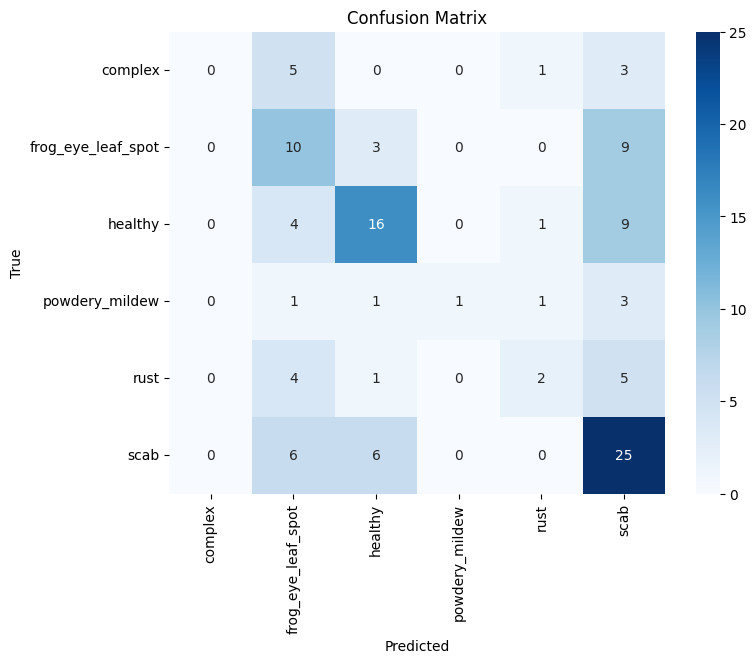

In [ ]:
y_true_np = np.array(y_true)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)
#print(y_pred_labels[0:10])
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels[0:117])

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true_np, y_pred_labels[0:117])

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_labels[0:117])
print("Classification Report:\n", report)

In [ ]:
seed = 1200
tf.random.set_seed(seed)

new_model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(6, activation='softmax')
])
new_model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 batch_normalization_11 (Ba  (None, 254, 254, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_12 (Ba  (None, 125, 125, 32)      128       
 tchNormalization)                                               
                                                      

In [ ]:
num_classes = 6

# Create F1 Score metric
f1 = tfa.metrics.F1Score(num_classes=num_classes, average='macro')

# Create EarlyStopping callback
callbacks = keras.callbacks.EarlyStopping(monitor=f1, patience=3, mode='max', restore_best_weights=True)

# Compile the model
new_model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy', f1]
)

# Train the model
history = new_model2.fit(
    train_data, # Replace with your actual training data
    epochs=40,
    validation_data=(test_data),  # Replace with your actual validation data
    callbacks=[callbacks]
)

Epoch 1/40
466/466 [==============================] - ETA: 0s - loss: 0.4466 - accuracy: 0.2606 - f1_score: 0.0786

466/466 [==============================] - 46s 86ms/step - loss: 0.4466 - accuracy: 0.2606 - f1_score: 0.0786 - val_loss: 0.4449 - val_accuracy: 0.2528 - val_f1_score: 0.0766
Epoch 2/40
466/466 [==============================] - ETA: 0s - loss: 0.4465 - accuracy: 0.2606 - f1_score: 0.0786

466/466 [==============================] - 42s 90ms/step - loss: 0.4465 - accuracy: 0.2606 - f1_score: 0.0786 - val_loss: 0.4449 - val_accuracy: 0.2528 - val_f1_score: 0.0766
Epoch 3/40
466/466 [==============================] - ETA: 0s - loss: 0.4465 - accuracy: 0.2606 - f1_score: 0.0786

466/466 [==============================] - 41s 87ms/step - loss: 0.4465 - accuracy: 0.2606 - f1_score: 0.0786 - val_loss: 0.4449 - val_accuracy: 0.2528 - val_f1_score: 0.0766
Epoch 4/40
466/466 [==============================] - ETA: 0s - loss: 0.4465 - accuracy: 0.2606 - f1_score: 0.0786

466/466 [==============================] - 42s 89ms/step - loss: 0.4465 - accuracy: 0.2606 - f1_score: 0.0786 - val_loss: 0.4449 - val_accuracy: 0.2528 - val_f1_score: 0.0766


KeyboardInterrupt: ignored

In [ ]:
new_model2.save('/content/drive/MyDrive/major/trained_model_custom.keras')
new_model2.save('/content/drive/MyDrive/major/trained_model_custom.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflow-addons
from tensorflow.keras.models import load_model
new_model2 = load_model('/content/drive/MyDrive/major/trained_model_custom.keras')

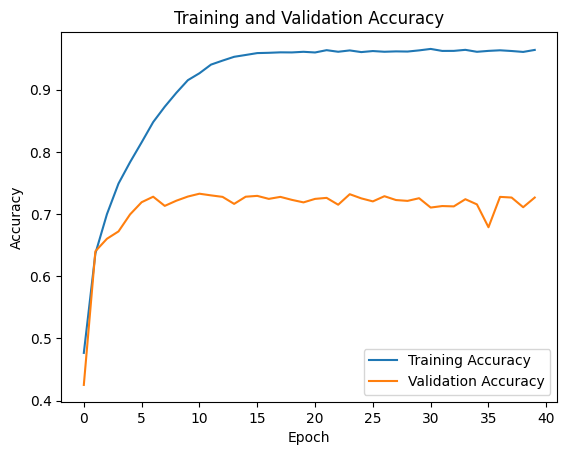

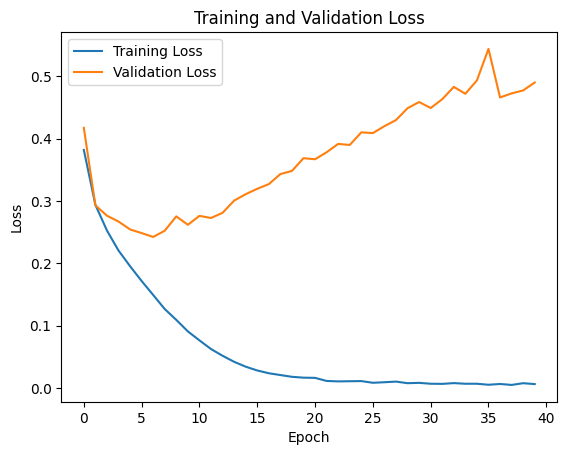

In [ ]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = new_model2.predict(test_data)

evaluation = new_model2.evaluate(test_data)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

117/117 [==============================] - 14s 117ms/step - loss: 0.4902 - accuracy: 0.7266 - f1_score: 0.6937
Test Loss: 0.4901781380176544
Test Accuracy: 0.7265897393226624


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a generator for your test data
# It's important that the generator is set to shuffle=False to ensure correct order
test_data.reset()

# Use the trained model to make predictions
y_true = [max(test_data.classes[i]) for i in range(len(test_data))]  # Ground truth labels
y_pred_probs = new_model2.predict(test_data)  # Predicted probabilities
y_true_np = np.array(y_true)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

117/117 [==============================] - 7s 57ms/step


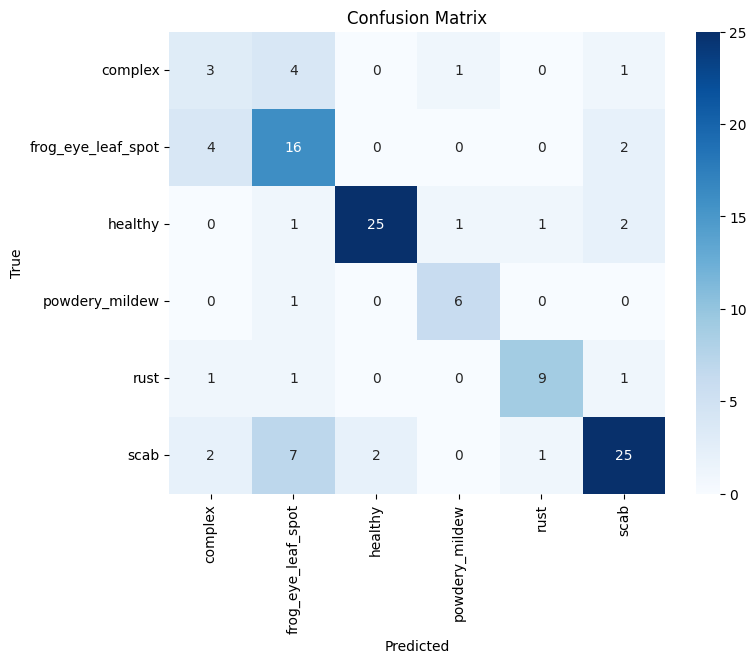

In [ ]:
y_true_np = np.array(y_true)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)
#print(y_pred_labels[0:10])
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels[0:117])

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true_np, y_pred_labels[0:117])

0.717948717948718

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_labels[0:117])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.53      0.73      0.62        22
           2       0.93      0.83      0.88        30
           3       0.75      0.86      0.80         7
           4       0.82      0.75      0.78        12
           5       0.81      0.68      0.74        37

    accuracy                           0.72       117
   macro avg       0.69      0.70      0.69       117
weighted avg       0.74      0.72      0.73       117

